In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

In [ ]:
cereals_df = pd.read_csv("cereal.csv")
cereals_df.head()

In [ ]:
plt.hist(cereals_df['sugars'])
plt.title('Sugars')
plt.show()

In [ ]:
plt.hist(cereals_df['vitamins'])
plt.title('Vitamins')
plt.show()

<AxesSubplot:xlabel='count', ylabel='mfr_full_name'>

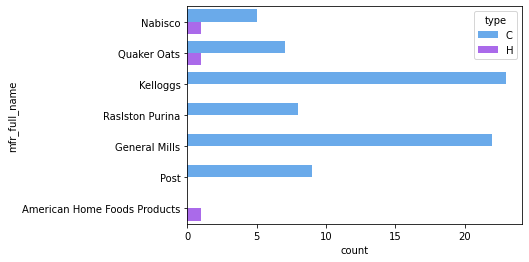

In [94]:
dict = {'N': 'Nabisco',
'Q': 'Quaker Oats',
'K': 'Kelloggs','R': 'Raslston Purina',
'G': 'General Mills' ,
'P' :'Post' ,
'A':'American Home Foods Products'}
cereals_df['mfr_full_name'] = cereals_df['mfr'].map(dict)

import seaborn as sns
sns.countplot(y='mfr_full_name', hue = 'type', data = cereals_df, palette = 'cool')

<BarContainer object of 7 artists>

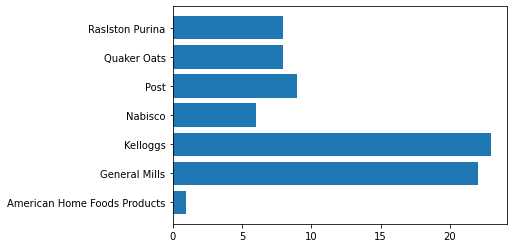

In [96]:
dff = cereals_df.groupby(['mfr_full_name'], as_index = False).count()
dff
plt.barh(dff['mfr_full_name'], dff['mfr'])

In [ ]:
'3. Extract the rating as your target variable ‘y’ and '
'all numerical parameters as your predictors ‘x’. Separate 25% of your data as test set.'
from sklearn import linear_model, metrics

In [ ]:
#new_df = df.iloc[:,3:]
new_df = cereals_df.iloc[:,3:-1]
print(new_df.head())
X = new_df.iloc[:,:-1]
print(X.shape)
#y = new_df.iloc[:,12:14]
y = new_df['rating']

print(y.shape)
#new_df


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
print (X_train.shape)
print (X_test.shape)
print(y_test)

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
reg.fit(X_train, y_train)
reg.coef_

In [ ]:
y_pred = reg.predict(X_test)
print(y_pred)
data = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
data

In [ ]:
print(metrics.mean_squared_error(reg.predict(X_test), (y_test)))
print(metrics.mean_absolute_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

In [ ]:
# Plot for residual error
plt.scatter(reg.predict(X_train), reg.predict(X_train)-y_train, color = 'green', label = 'TrainData' )

plt.scatter(reg.predict(X_test), reg.predict(X_test)-y_test, color = 'blue', label = 'TrainData' )
plt.legend()

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 90, linewidth = 2) 